##### camsol.io miniproject
## HR Analytics-Employee Retention Prediction

### Problem statement
- Employee retention prediction using Logistic Regression.

### Outline
-Importing important libraries
- Reading data using pandas
- Exploratory data analysis and visualization.
- Data processing for machine learning.
- Training a Logistic Regression model.
- Model predictions and Evaluation
- Features selection using L1 Regularization.

## Import libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

## Read data using pandas

In [99]:
HR_df = pd.read_csv("D:/sqldatasets/HR_comma_sep.csv")

In [100]:
HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [101]:
HR_df.rename(columns = {'sales':'department'},inplace = True)

In [102]:
HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis(EDA) and Visualization
- Finding data types of columns and size of dataset
- Missing values detection and treatment
- Identifying and deroping duplicate  rows
- Droping irrelevant columns
- Univariate analysis(Understanding data distribution)
- Bivariate analysis(Understanding the relationship between 2 features)
- Multivariate analysis(correlation)

In [103]:
# Finding the datatypes of columbs
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [104]:
#Size of the dataset
HR_df.shape

(14999, 10)

It is good idea to always have an idea about the data size. So as to know how to handle the data without losing much information.

In [105]:
## Missing values detection and treatment
HR_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Due to the fact that there are no NaN values within the dataset, the dataset seems to be fairly clean.

In [106]:
HR_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Statistical analysis

In [107]:
HR_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Distribution of continues data in some columns of the dataset
##### Aim:
- To checking the skewness of data and
- Checking whether the dataset is balanced or not

In [66]:
HR_df.skew(axis = 0, skipna = True)

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

From the above calculation the entire dataset seems to be either left or right skewed.

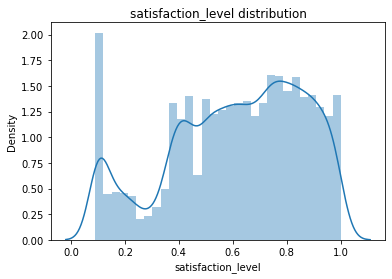

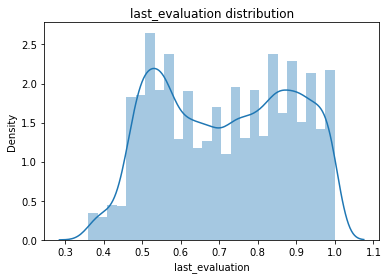

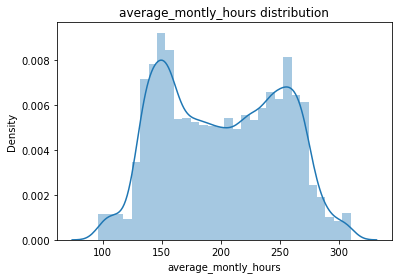

In [108]:
cols = ['satisfaction_level','last_evaluation','average_montly_hours']

for x in cols:
    plt.figure()
    sns.distplot(HR_df[x])
    plt.title("{} distribution".format(x))

It could be observed from the above visualization that data in of the columns in the dataset is not normally distributed. That is the the dataset is skewed as the mean of each column differs from it median value.

####  Left column distribution

In [40]:
HR_df['left'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

Text(0.5, 1.0, 'left distribution')

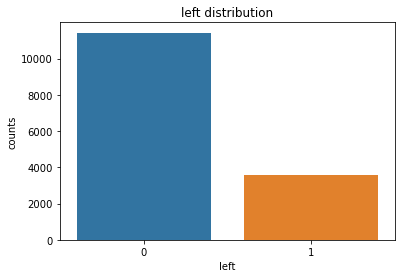

In [41]:
sns.barplot(y = HR_df['left'].value_counts().values, x = HR_df['left'].value_counts().index)
plt.xlabel('left')
plt.ylabel('counts')
plt.title('left distribution')

- About 76.2% of the employees were retent while 23.8% was not. From this statistics it could be said that the dataset is imbalanced.
- To solve this problem Tree algorithms(Decision Tress, RandomForest and GBMs could be used) instead of down_sampling or over_sampling.

### Understanding the effect of each column on customer retention

##### Employee Salary

<AxesSubplot:xlabel='salary', ylabel='count'>

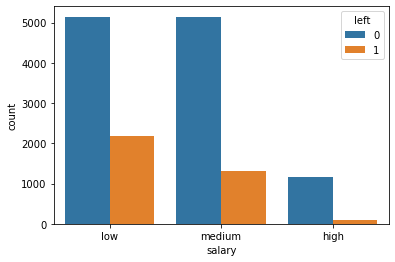

In [42]:
sns.countplot(HR_df['salary'], hue = HR_df['left'])

It could be observed from the above visualization that the lower the employee salary,the greater the tendecy for the employee to leave. Therefore there seems to exist a negative correlation between the employee salary and the target.

##### Employee department

<AxesSubplot:xlabel='department'>

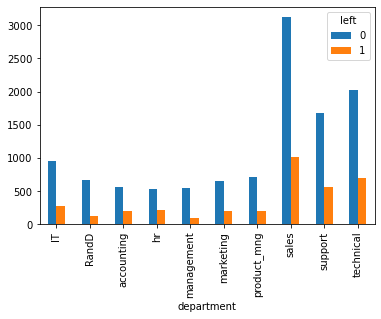

In [44]:
pd.crosstab(HR_df['department'],HR_df['left']).plot(kind = 'bar')

Most of the employees that left were in the sales, technical and support departments. Therefore the tendency that in any of these department will leave is high.

In [45]:
HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###### Satisfaction level

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

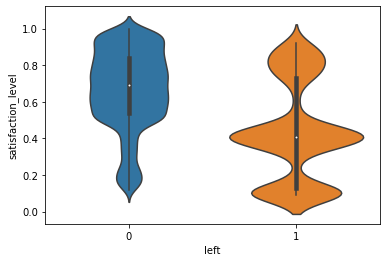

In [18]:
sns.violinplot(data = HR_df, x= 'left', y = 'satisfaction_level')

 Most of the works that left had their satisfaction level arround 0.4

##### promotion_last_5years

In [19]:
HR_df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

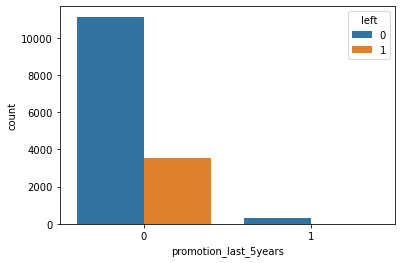

In [20]:
sns.countplot(data = HR_df,x='promotion_last_5years',hue = 'left')

97.9% of the employees has not had promotion for the past 5 years and some of them have left the company. Therefore the tendency that an employee who has not had promotion for the past 5 years will leave is high.

<AxesSubplot:xlabel='average_montly_hours', ylabel='last_evaluation'>

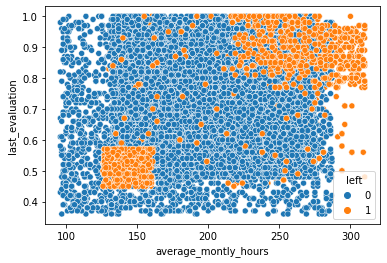

In [21]:
sns.scatterplot(data = HR_df,x = 'average_montly_hours',y ='last_evaluation',hue = 'left')

- Also, most of the employee that left the company had average_monthly working hours of 225 and above and an evauation of 0.8 and above. 

### Correlation Test

<AxesSubplot:>

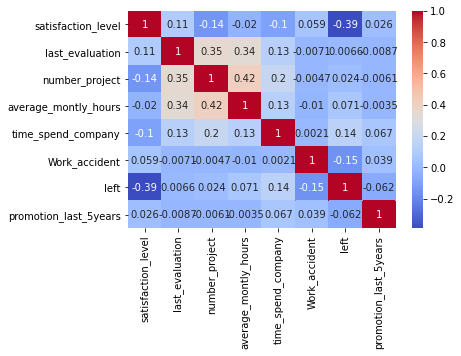

In [22]:
sns.heatmap(HR_df.corr(method = 'pearson'),cmap = 'coolwarm',annot = True)

From the correlation matrix above,
- The target column left seems to have strong negative correlation with the employee statisfaction.

#### Handling the skewness of data using Log transform
- This is to help normalize the data

In [65]:
np.log(HR_df['satisfaction_level']).skew()

-1.554380152249328

In [67]:
# Log transform multiple columns in dataframe 
HR_df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']] = HR_df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']].apply(lambda x: np.log(x))

In [68]:
HR_df.skew()

satisfaction_level      -1.554380
last_evaluation         -0.335510
number_project          -0.294982
average_montly_hours    -0.302675
time_spend_company       0.588533
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

In [69]:
HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,-0.967584,-0.634878,0.693147,5.056246,1.098612,0,1,0,sales,low
1,-0.223144,-0.150823,1.609438,5.568345,1.791759,0,1,0,sales,medium
2,-2.207275,-0.127833,1.945910,5.605802,1.386294,0,1,0,sales,medium
3,-0.328504,-0.139262,1.609438,5.407172,1.609438,0,1,0,sales,low
4,-0.994252,-0.653926,0.693147,5.068904,1.098612,0,1,0,sales,low


### Building a Machine Learning Model to Predict Employee Retention
- This is a binary classification problem with just two outcomes (employee will leave(1) or employee will not leave(0)) to be predicted. The suitable model that can be used for this problem is _Logistic Regression_.
- This phase will include:
1. Data processing for the ML model
2. Building ,Training and Validation of the Logistic regression model
3. Model Testing and Evaluation.
4. Model Optimization through Hyperparameters tuning

## Data processing for the ML model

#### Splitting the dataset set into training,validation and test sets

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train_val_df,test_df = train_test_split(HR_df, test_size = 0.2, random_state = 42)

In [72]:
train_df,val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [73]:
train_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2976,-1.427116,-0.597837,1.609438,5.337538,1.609438,0,0,0,RandD,low
11307,-0.328504,-0.478036,1.098612,5.493061,0.693147,1,0,0,hr,low
7699,-0.713350,-0.223144,1.098612,5.472271,1.386294,0,0,0,product_mng,low


In [74]:
val_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
3002,-0.843970,-0.462035,1.098612,5.049856,1.098612,0,0,0,sales,medium
6653,-0.061875,-0.415515,1.386294,5.438079,0.693147,0,0,0,sales,low
7948,-0.261365,-0.733969,1.098612,5.318120,1.791759,0,0,0,sales,high


In [75]:
test_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
6723,-0.430783,-0.040822,1.609438,5.420535,0.693147,1,0,0,marketing,medium
6473,-0.127833,-0.223144,1.098612,5.111988,0.693147,0,0,0,IT,low
4679,-0.371064,-0.020203,1.098612,5.365976,0.693147,0,0,0,sales,low


#### Identifying Input and Target Columns

In [76]:
input_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary']

target_col = 'left'

In [77]:
#create inputs and targets for the training, validation and test sets for
#further processing and model training.
#Training set
train_input = train_df[input_cols]
train_target = train_df[target_col]
#Validation set
val_input = val_df[input_cols]
val_target = val_df[target_col]
#Test set
test_input = test_df[input_cols]
test_target = test_df[target_col]


In [78]:
train_input.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
2976,-1.427116,-0.597837,1.609438,5.337538,1.609438,0,0,RandD,low
11307,-0.328504,-0.478036,1.098612,5.493061,0.693147,1,0,hr,low
7699,-0.713350,-0.223144,1.098612,5.472271,1.386294,0,0,product_mng,low
12260,-0.776529,-0.776529,0.693147,5.036953,1.098612,0,0,accounting,medium
16,-0.798508,-0.755023,0.693147,5.075174,1.098612,0,0,sales,low


### Identifying numerical and Categorical columns

In [79]:
numeric_cols = train_input.select_dtypes(include = np.number).columns.tolist()
cat_cols = train_input.select_dtypes('object').columns.tolist()

In [80]:
numeric_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [81]:
cat_cols

['department', 'salary']

### Imputation of numerical columns
##### NOTE:
From EDA, dataset had no NaN values in both the numerical and categorical column. Thus no need for imputation.

In [82]:
import warnings
warnings.filterwarnings('ignore')
#Importing and building a simple imputer
from sklearn.impute import SimpleImputer

# Building the imputer
imputer = SimpleImputer(strategy = 'mean')

#Fiting the imputer into the entire dataset
imputer.fit(HR_df[numeric_cols])

#imputing missing values in the numeric columns of each datasets
train_input[numeric_cols] = imputer.transform(train_input[numeric_cols])
val_input[numeric_cols] = imputer.transform(val_input[numeric_cols])
test_input[numeric_cols] = imputer.transform(test_input[numeric_cols])

In [83]:
?imputer

### Scaling of numeric columns using the MinMax Scaler
- This is to ensure that non of the features has a disproportionate impact on the model loss more than the other.

In [84]:
from sklearn.preprocessing import MinMaxScaler

#Building the scaler
scaler = MinMaxScaler()

#fitting the scaler into the HR_df
scaler.fit(HR_df[numeric_cols])

#Scaling of numeric columns using the tranform method
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])


In [85]:
?scaler

In [86]:
train_input[numeric_cols].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
2976,0.407330,0.414833,0.731416,0.659592,0.569323,0.0,0.0
11307,0.863575,0.532095,0.323657,0.792266,0.000000,1.0,0.0
7699,0.703752,0.781585,0.323657,0.774530,0.430677,0.0,0.0
12260,0.677514,0.239928,0.000000,0.403169,0.251930,0.0,0.0
16,0.668386,0.260978,0.000000,0.435775,0.251930,0.0,0.0


## OneHot encoding of Categorical columns
- This techniques set each unique entry of the categorical column as a column on its own.
- Each entry is encoded as a series of 0's and 1's.

In [87]:
from sklearn.preprocessing import OneHotEncoder

#Building the encoder
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

#Fitting the encoder into the dataset
encoder.fit(HR_df[cat_cols])

#Getting the uniques categories per column
print(encoder.categories_)

#Geerating the names for the various categories
encoded_cols = list(encoder.get_feature_names(cat_cols))
print(encoded_cols)

# encoding the categorical columns
train_input[encoded_cols] = encoder.transform(train_input[cat_cols])
val_input[encoded_cols] = encoder.transform(val_input[cat_cols])
test_input[encoded_cols] = encoder.transform(test_input[cat_cols])


[array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object), array(['high', 'low', 'medium'], dtype=object)]
['department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_high', 'salary_low', 'salary_medium']


In [88]:
?encoder

#### Final Processed data

In [89]:
#train dataset
train_input.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
2976,0.407330,0.414833,0.731416,0.659592,0.569323,0.0,0.0,RandD,low,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11307,0.863575,0.532095,0.323657,0.792266,0.000000,1.0,0.0,hr,low,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7699,0.703752,0.781585,0.323657,0.774530,0.430677,0.0,0.0,product_mng,low,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12260,0.677514,0.239928,0.000000,0.403169,0.251930,0.0,0.0,accounting,medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,0.668386,0.260978,0.000000,0.435775,0.251930,0.0,0.0,sales,low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [90]:
#Validation dataset
val_input.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
3002,0.649506,0.547756,0.323657,0.414177,0.251930,0.0,0.0,sales,medium,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6653,0.974304,0.593290,0.553295,0.745362,0.000000,0.0,0.0,sales,low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7948,0.891457,0.281585,0.323657,0.643027,0.682606,0.0,0.0,sales,high,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14730,0.608958,0.340925,0.000000,0.252054,0.251930,0.0,0.0,IT,low,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
428,0.587095,0.218415,0.000000,0.231981,0.251930,0.0,0.0,support,medium,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [91]:
test_input.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
6723,0.821099,0.960043,0.731416,0.730395,0.00000,1.0,0.0,marketing,medium,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6473,0.946912,0.781585,0.323657,0.467180,0.00000,0.0,0.0,IT,low,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4679,0.845900,0.980225,0.323657,0.683852,0.00000,0.0,0.0,sales,low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
862,0.629727,0.260978,0.000000,0.403169,0.25193,0.0,0.0,sales,low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7286,0.942166,0.731379,0.731416,0.830034,0.00000,1.0,0.0,hr,low,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Building ,Training and Validation of the Logistic regression model

In [92]:
#importing gridsearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [93]:
#Import the model
from sklearn.linear_model import LogisticRegression

#Building the model
LR_model = LogisticRegression(penalty = 'l1',solver = 'liblinear')

#regularization strength,small values corresponds to strong regularization
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

## Perform GridSearchCV to tune best-fit LR model
Gs_model = GridSearchCV(estimator=LR_model, param_grid=param)
Gs_model.fit(train_input[numeric_cols + encoded_cols],train_target)

# Train a LR model with best parameters
model = LogisticRegression(**Gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(train_input[numeric_cols + encoded_cols],train_target)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [56]:
?LR_model

### Model Predictions and Evaluation

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix

X_train = train_input[numeric_cols + encoded_cols]
X_val = val_input[numeric_cols + encoded_cols]
X_test = test_input[numeric_cols + encoded_cols]

#Defining a helper function to generate predictions, compute the accuracy score and plot a 
#confusion matrix for a given st of inputs.
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("{}_Accuracy: {:.2f}%".format(name,accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf,cmap = 'coolwarm',annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Training_Accuracy: 82.42%
Validation_Accuracy: 82.03%
Test_Accuracy: 81.57%


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

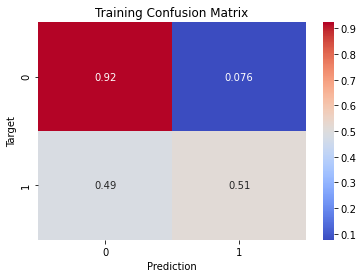

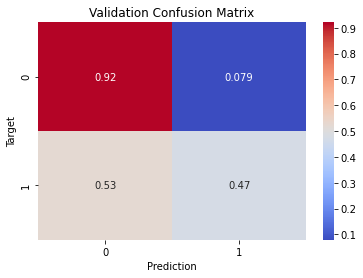

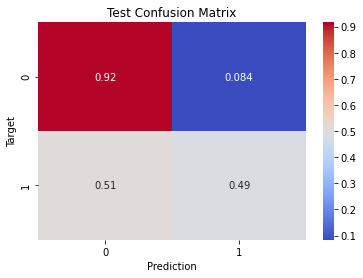

In [95]:
predict_and_plot(X_train, train_target, 'Training')
predict_and_plot(X_val, val_target, 'Validation')
predict_and_plot(X_test, test_target, 'Test')

### Features selection using L1 Regularization

Computing the coefficients of the Logistic Regression model using model.coef_ function, that returns with the weight vector of the logistic regression dividing plane.

In [96]:
model.coef_[0]

array([-4.36008085,  0.34257295, -2.83743007,  1.09363735,  2.85502329,
       -1.56783105, -1.12672522,  0.59463094,  0.1888043 ,  0.77837302,
        1.05764066,  0.4032928 ,  0.84035085,  0.846802  ,  0.81187663,
        0.84137607,  0.9620966 , -2.01164563, -0.01048814, -0.54873453])

Based on the cofficients values obtained as a results of l1 regularization, it shows that none of the features is redundant.

### Summary
- The logistic regression model was trained, validated and tested over a dataset of 14999 records
- The salary of the employee seems to have a strong negative effect on the employee retention.
- Through EDA the data was observed to be imbalanced. Due to the small size of the dataset,downsampling could not be performed. Also oversampling could not also be performed inorder to avoid overfitting. To take care of this problem, tree models could be trained.
- Again through EDA the data was observed to be skewed. To handle this skewness the _Log transformation_ was applied. This hepled to increase the model accuracy on the validation set from 78% to about 82%.
- L1 regularization was used for feature selection.